## Unsupervised Learning 
### Case Study - 1 (CS 37)
### K-means Clustering

**Domain –** Automotive

**Focus –** Incentivize drivers

**Business challenge/requirement:**

Company ABC  is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.
Company ABC   has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as over speeding, distance driven per day etc.
You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.


### Importing libraries and loading data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
df = pd.read_csv("datasets/driver-data.csv")
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [59]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [60]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [61]:
df.count()

id                      4000
mean_dist_day           4000
mean_over_speed_perc    4000
dtype: int64

In [62]:
df.notnull().sum()

id                      4000
mean_dist_day           4000
mean_over_speed_perc    4000
dtype: int64

In [63]:
df.shape

(4000, 3)

### Independent variable X

In [64]:
X = df.iloc[:,[1,2]].values
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

### Elbow method

In [65]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++')
    kmeans.fit(X)
    wcss.append (kmeans.inertia_)
    
wcss

[12184626.129627967,
 1316420.850947721,
 992634.0606702501,
 719601.1096991905,
 534787.281677069,
 372843.3801705036,
 329977.47323707293,
 276903.6909989748,
 252887.7072178553,
 230038.66260476364]

### Elbow method graph

Text(0, 0.5, 'wcss')

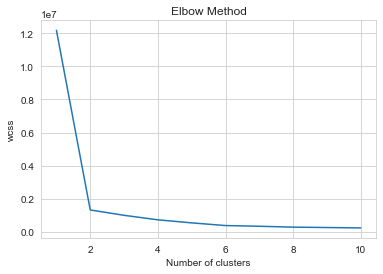

In [66]:
plt.plot (range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')

### Model with n_clusters = 2

In [67]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [68]:
# Central points

kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [69]:
print("Cluster names: {}.".format(kmeans.labels_))
print("Number of labels: {}.".format(len(kmeans.labels_)))

Cluster names: [0 0 0 ... 1 1 1].
Number of labels: 4000.


In [70]:
print("Type: {}.".format(type(kmeans.labels_)))

Type: <class 'numpy.ndarray'>.


### Record count by cluster

In [71]:
unique, count = np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, count)))

{0: 3200, 1: 800}


### Plot the graph

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahil\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


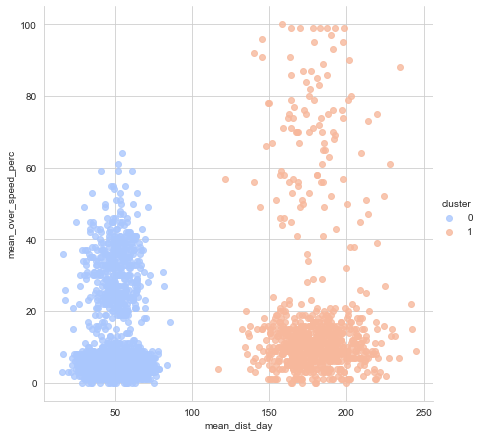

In [72]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

### Saving the result as xlsx

In [73]:
Final = pd.concat([df,pd.DataFrame(kmeans.labels_, columns = ['Cluster'])],axis =1)
Final.to_excel("datasets/processed/driver-data2-clusters.xlsx")
Final

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


---

### Model with n_clusters = 4

In [74]:
kmeans =  KMeans (n_clusters =  4 , init = 'k-means++')
kmeans = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 2, 2, ..., 1, 1, 1])

### Plotting the graph

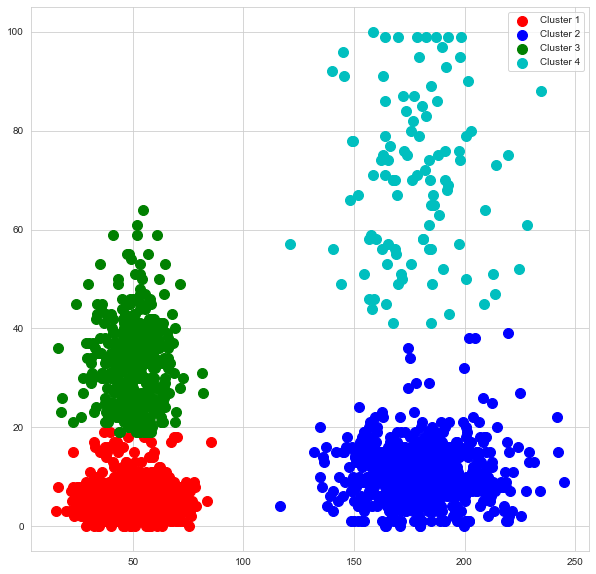

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.legend()

### Saving results as xlsx

In [76]:
Final = pd.concat([df,pd.DataFrame(y_kmeans, columns = ['Cluster'])],axis =1)
Final.to_excel("datasets/processed/driver-data4-clusters.xlsx")

In [77]:
Final

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


---